<a href="https://colab.research.google.com/github/gorky93/stackoverflow_analysis/blob/main/stackoverflow24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git config --global user.email "sdmathdeep@gmail.com"
!git config --global user.name "gorky93"

In [3]:
!git clone https://github.com/gorky93/stackoverflow_analysis.git

Cloning into 'stackoverflow_analysis'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 4.06 KiB | 4.06 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [4]:
import zipfile
zip_path = '/content/drive/My Drive/Project Data/stack-overflow-developer-survey-2024.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('./data')

In [5]:
!ls '/content/drive/My Drive/Project Data/'

'CBC data_for_meandeley_csv1.csv'   stack-overflow-developer-survey-2024.zip


In [6]:
!ls

data  drive  sample_data  stackoverflow_analysis


In [7]:
import os
print(os.listdir('./data'))

['survey_results_public.csv', '2024 Developer Survey.pdf', 'survey_results_schema.csv']


In [8]:
# importing important libraries and initial exploration.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set up plotting styles
# plt.style.use('seaborn-whitegrid')  # This style is deprecated.
plt.style.use('seaborn-v0_8-whitegrid')  # Use this style instead for Seaborn whitegrid theme.
sns.set(style="whitegrid")  # Seaborn's set function still works with "whitegrid".

In [9]:
survey_results = pd.read_csv('./data/survey_results_public.csv')
schema = pd.read_csv('./data/survey_results_schema.csv')

In [10]:
print(f"Dataset shape: {survey_results.shape}")
survey_results.head()

Dataset shape: (65437, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


So, it appears that in the dataset, there are 114 columns and 65,437 rows. The first thing i want to understand is the demographics.

In [11]:
schema.columns

Index(['qid', 'qname', 'question', 'force_resp', 'type', 'selector'], dtype='object')

In [12]:
survey_results.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [13]:
schema

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR
...,...,...,...,...,...,...
82,QID337,JobSatPoints_7,"Learning and using new technology, including p...",NaN,MC,MAVR
83,QID337,JobSatPoints_8,"Designing and building environments, databases...",NaN,MC,MAVR
84,QID337,JobSatPoints_9,"Being a power user of a tool, developer langua...",NaN,MC,MAVR
85,QID337,JobSatPoints_10,Working with new and/or top-quality hardware,NaN,MC,MAVR


From the schma dataframe, we only require the qname and the question stated explicitly. So it's better to take the two columns and convert it into a pandas series.

In [14]:
schema_series = schema.set_index('qname')['question']

In [19]:
schema_series

,question
qname,
MainBranch,Which of the following options best describes ...
Age,What is your age?*
Employment,Which of the following best describes your cur...
RemoteWork,Which best describes your current work situation?
Check,Just checking to make sure you are paying atte...
...,...
JobSatPoints_7,"Learning and using new technology, including p..."
JobSatPoints_8,"Designing and building environments, databases..."
JobSatPoints_9,"Being a power user of a tool, developer langua..."


Let's start with demographic analysis, and analyze the column age

In [21]:
survey_results['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

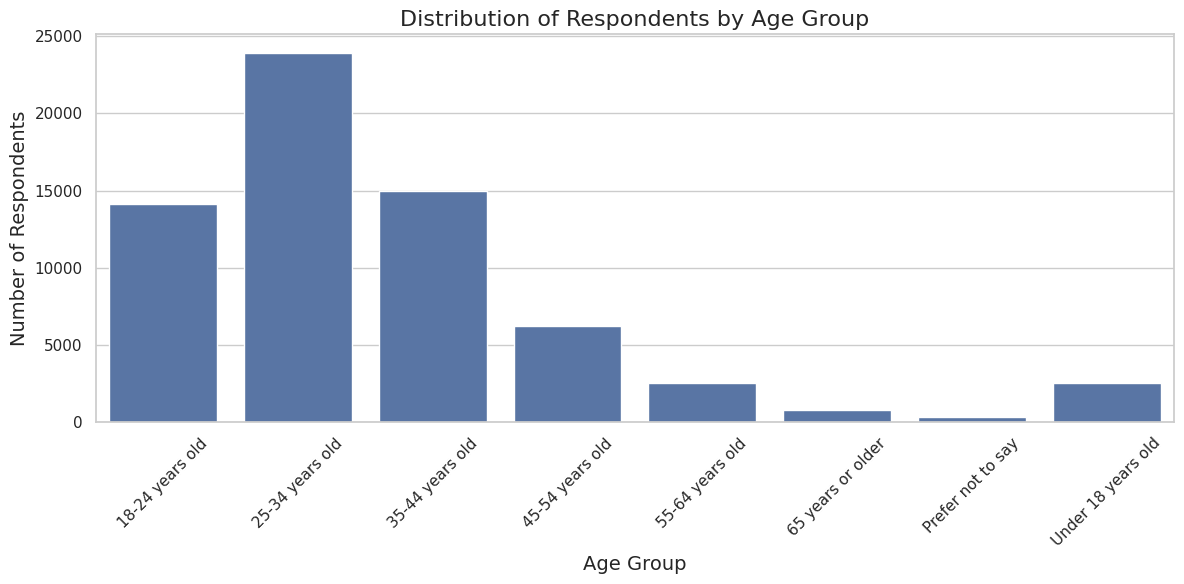

In [22]:
plt.figure(figsize=(12, 6))
age_counts = survey_results['Age'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Distribution of Respondents by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()